# EDA FOR HAPPINESS CSV
### By: Liseth Esmeralda Erazo Varela

As a starter, let’s import the dependencies.

In [2]:
import numpy as np
import geopandas as gpd
import geodatasets 
import pandas as pd
import pycountry_convert as pc
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from fitter import Fitter 
import os

Charge the dataset 

In [3]:
data2015 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2015.csv')
data2016 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2016.csv')
data2017 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2017.csv')
data2018 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2018.csv')
data2019 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2019.csv')


Checking the different features present in the dataset and shape

In [4]:
data2015.columns.values

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

In [5]:
data2016.columns.values

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'], dtype=object)

In [6]:
data2017.columns.values

array(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'], dtype=object)

In [7]:
data2018.columns.values

array(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], dtype=object)

In [8]:
data2019.columns.values

array(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], dtype=object)

In [9]:
data2015.shape

(158, 12)

In [10]:
data2016.shape

(157, 13)

In [11]:
data2017.shape

(155, 12)

In [12]:
data2018.shape

(156, 9)

In [13]:
data2019.shape

(156, 9)

Check the nulls 

In [14]:
data2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [15]:
data2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [16]:
data2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [17]:
data2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [18]:
data2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

we need standarize the columns names for do the merge. 

In [19]:
column_rename_map = {
    'Country': 'Country',
    'Country or region': 'Country',
    'Happiness Rank': 'Rank',
    'Happiness.Rank': 'Rank',
    'Overall rank': 'Rank',
    
    'Happiness Score': 'Score',
    'Happiness.Score': 'Score',
    'Score': 'Score',
    
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    
    'Family': 'Social support',
    'Social support': 'Social support',
    
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',
    
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',
    
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',
    
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual',
    'Dystopia.Residual': 'Dystopia Residual'
}

In [20]:
def prepare_data(df, year):
    df = df.rename(columns=column_rename_map)
    df['Year'] = year
    return df[[
        'Country', 'Year', 'Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption', 'Social support']]


In [21]:
df15 = prepare_data(data2015, 2015)
df16 = prepare_data(data2016, 2016)
df17 = prepare_data(data2017, 2017)
df18 = prepare_data(data2018, 2018)
df19 = prepare_data(data2019, 2019)


In [22]:
df15.head()
df16.head()
df17.head()
df18.head()
df19.head()

,Country,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support
0,Finland,2019,7.769,1.340,0.986,0.596,0.153,0.393,1.587
1,Denmark,2019,7.600,1.383,0.996,0.592,0.252,0.410,1.573
2,Norway,2019,7.554,1.488,1.028,0.603,0.271,0.341,1.582
3,Iceland,2019,7.494,1.380,1.026,0.591,0.354,0.118,1.624
4,Netherlands,2019,7.488,1.396,0.999,0.557,0.322,0.298,1.522


In [23]:
df = pd.concat([df15, df16, df17, df18, df19], ignore_index=True)


In [24]:
df.head()

,Country,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support
0,Switzerland,2015,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,1.34951
1,Iceland,2015,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,1.40223
2,Denmark,2015,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,1.36058
3,Norway,2015,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,1.33095
4,Canada,2015,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,1.32261


In [25]:
unmatched_countries = []
def country_to_continent(country_name):
    try:
        # Estandariza el nombre del país
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception:
        unmatched_countries.append(country_name)
        return 'Unknown'

# Estandarizar la columna (opcional pero recomendable)
df['Country'] = df['Country'].str.strip().str.title()

# Aplicar la función
df['Continent'] = df['Country'].apply(country_to_continent)

In [26]:

print("\nPaíses no reconocidos:")
print(sorted(set(unmatched_countries)))



Países no reconocidos:
['Bosnia And Herzegovina', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Hong Kong S.A.R., China', 'Kosovo', 'North Cyprus', 'Palestinian Territories', 'Somaliland Region', 'Taiwan Province Of China', 'Trinidad & Tobago', 'Trinidad And Tobago']


In [27]:
manual_country_to_continent = {
    'Bosnia And Herzegovina': 'Europe',
    'Congo (Brazzaville)': 'Africa',
    'Congo (Kinshasa)': 'Africa',
    'Hong Kong S.A.R., China': 'Asia',
    'Kosovo': 'Europe',
    'North Cyprus': 'Asia',
    'Palestinian Territories': 'Asia',
    'Somaliland Region': 'Africa',
    'Taiwan Province Of China': 'Asia',
    'Trinidad & Tobago': 'America',
    'Trinidad And Tobago': 'America',
}

unmatched_countries = []

def country_to_continent(country_name):
    try:
        if country_name in manual_country_to_continent:
            return manual_country_to_continent[country_name]
        else:
            alpha2 = pc.country_name_to_country_alpha2(country_name)
            continent_code = pc.country_alpha2_to_continent_code(alpha2)
            continent = pc.convert_continent_code_to_continent_name(continent_code)

        if continent in ['North America', 'South America']:
            return 'America'
        return continent
    except:
        unmatched_countries.append(country_name)
        return 'Unknown'
    
df['Country'] = df['Country'].str.strip().str.title()
df['Continent'] = df['Country'].apply(country_to_continent)

print("Países no reconocidos:")
print(sorted(set(unmatched_countries)))


Países no reconocidos:
[]


In [28]:
df.drop(columns=['Country'], inplace=True)

In [29]:
df.head()

,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support,Continent
0,2015,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,1.34951,Europe
1,2015,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,1.40223,Europe
2,2015,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,1.36058,Europe
3,2015,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,1.33095,Europe
4,2015,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,1.32261,America


<Axes: xlabel='Year', ylabel='Score'>

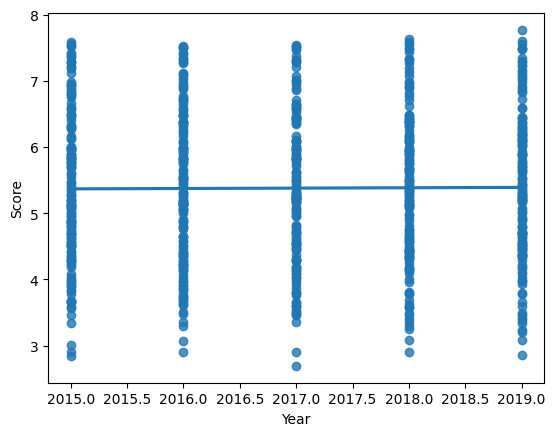

In [30]:
sns.regplot(x='Year', y='Score', data=df, ci=None)

In [31]:
df.head()

,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support,Continent
0,2015,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,1.34951,Europe
1,2015,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,1.40223,Europe
2,2015,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,1.36058,Europe
3,2015,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,1.33095,Europe
4,2015,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,1.32261,America


Create a sequential ID by year (format: YYYYNN, e.g., 202301, 202302...)


In [32]:
df['ID'] = (
    df.groupby('Year').cumcount() + 1
).astype(str).str.zfill(2)  
df['ID'] = df['Year'].astype(str) + df['ID']

Now, lets make the EDA 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          782 non-null    int64  
 1   Score                         782 non-null    float64
 2   GDP per capita                782 non-null    float64
 3   Healthy life expectancy       782 non-null    float64
 4   Freedom to make life choices  782 non-null    float64
 5   Generosity                    782 non-null    float64
 6   Perceptions of corruption     781 non-null    float64
 7   Social support                782 non-null    float64
 8   Continent                     782 non-null    object 
 9   ID                            782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


In [34]:
df.describe()

,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,2016.993606,5.379018,0.916047,0.612416,0.411091,0.218576,0.125436,1.078392
std,1.417364,1.127456,0.407340,0.248309,0.152880,0.122321,0.105816,0.329548
min,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.509750,0.606500,0.440183,0.309768,0.130000,0.054000,0.869363
50%,2017.000000,5.322000,0.982205,0.647310,0.431000,0.201982,0.091000,1.124735
75%,2018.000000,6.189500,1.236187,0.808000,0.531000,0.278832,0.156030,1.327250
max,2019.000000,7.769000,2.096000,1.141000,0.724000,0.838075,0.551910,1.644000


In [35]:
df.isnull().sum()


Year                            0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Social support                  0
Continent                       0
ID                              0
dtype: int64

In [36]:
df.shape

(782, 10)

In [37]:
df.drop(489, axis=0,inplace=True)


In [38]:
df.shape

(781, 10)

In [39]:
df.head(10)

,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support,Continent,ID
0,2015,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,1.34951,Europe,201501
1,2015,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,1.40223,Europe,201502
2,2015,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,1.36058,Europe,201503
3,2015,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,1.33095,Europe,201504
4,2015,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,1.32261,America,201505
5,2015,7.406,1.29025,0.88911,0.64169,0.23351,0.41372,1.31826,Europe,201506
6,2015,7.378,1.32944,0.89284,0.61576,0.47610,0.31814,1.28017,Europe,201507
7,2015,7.364,1.33171,0.91087,0.65980,0.36262,0.43844,1.28907,Europe,201508
8,2015,7.286,1.25018,0.90837,0.63938,0.47501,0.42922,1.31967,Oceania,201509
9,2015,7.284,1.33358,0.93156,0.65124,0.43562,0.35637,1.30923,Oceania,201510


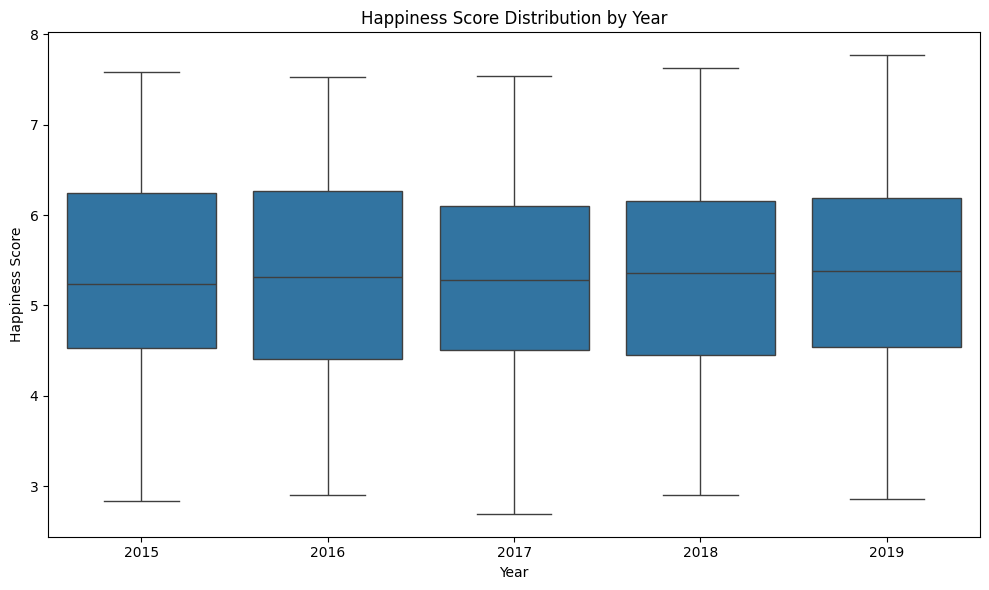

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Year',
    y='Score',
    data=df
)

plt.title("Happiness Score Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Score promedio')

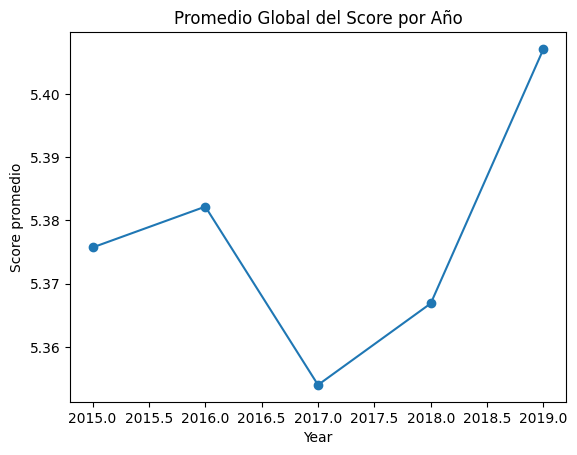

In [41]:
df.groupby('Year')['Score'].mean().plot(marker='o')
plt.title("Promedio Global del Score por Año")
plt.ylabel("Score promedio")

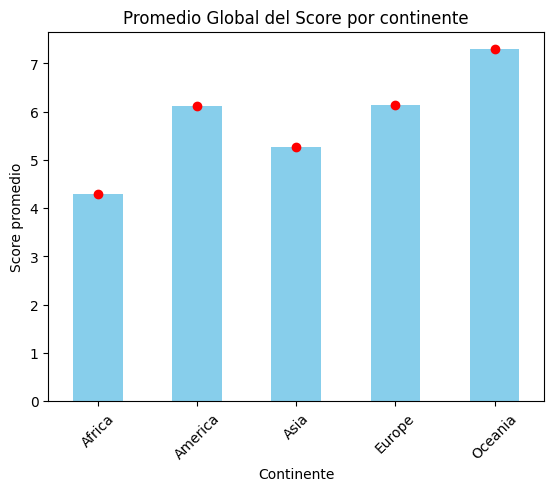

In [42]:
continent_score = df.groupby('Continent')['Score'].mean()
ax = continent_score.plot(kind='bar', color='skyblue')
plt.plot(range(len(continent_score)), continent_score.values, 'o', color='red')

plt.title("Promedio Global del Score por continente")
plt.ylabel("Score promedio")
plt.xlabel("Continente")
plt.xticks(rotation=45)

plt.show()


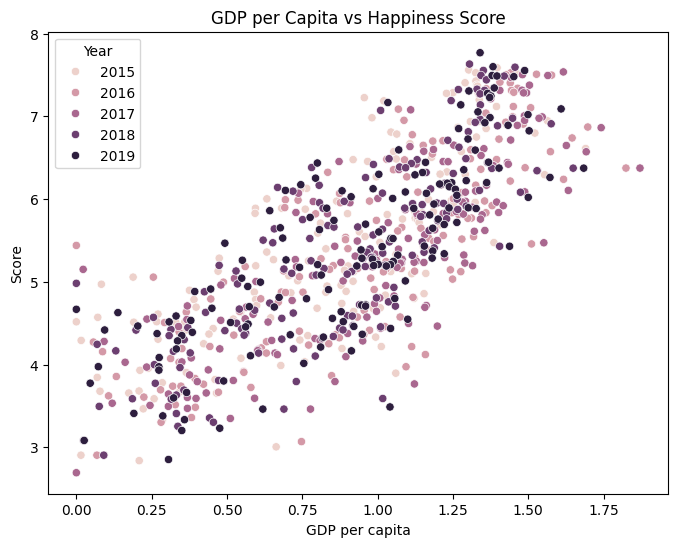

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita', y='Score', hue='Year', data=df)
plt.title('GDP per Capita vs Happiness Score')
plt.show()

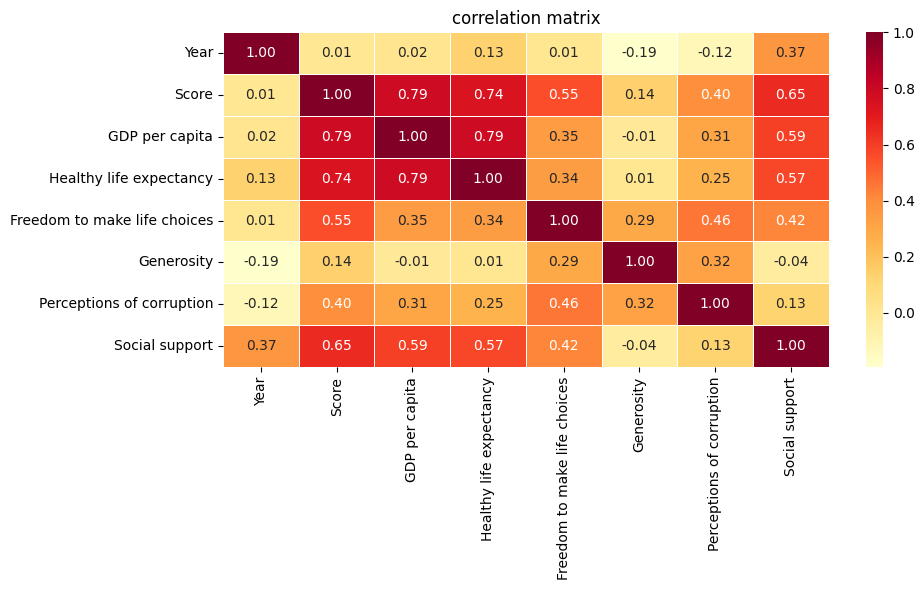

In [44]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title("correlation matrix")
plt.tight_layout()
plt.show()


In [45]:
from scipy.stats import f_oneway

# Agrupar los scores por continente
continent_groups = [group['Score'].values for name, group in df.groupby('Continent')]

# Aplicar ANOVA de una vía
f_stat, p_value = f_oneway(*continent_groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

log_p = np.log(p_value)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 184.16643881572574
P-value: 6.378595391013326e-111
F-statistic: 184.16643881572574
P-value: 6.378595391013326e-111


In [46]:
continent_dummies = pd.get_dummies(df['Continent'], prefix='Continent')

continent_dummies = continent_dummies.astype(int)

df= pd.concat([df, continent_dummies], axis=1)



In [47]:
happiness_df = df[['Score', 'GDP per capita', 
                 'Healthy life expectancy', 'Freedom to make life choices',
                 'Generosity', 'Perceptions of corruption','Continent_Africa','Continent_America','Continent_Asia','Continent_Europe','Continent_Oceania']].copy()


In [48]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         781 non-null    float64
 1   GDP per capita                781 non-null    float64
 2   Healthy life expectancy       781 non-null    float64
 3   Freedom to make life choices  781 non-null    float64
 4   Generosity                    781 non-null    float64
 5   Perceptions of corruption     781 non-null    float64
 6   Continent_Africa              781 non-null    int64  
 7   Continent_America             781 non-null    int64  
 8   Continent_Asia                781 non-null    int64  
 9   Continent_Europe              781 non-null    int64  
 10  Continent_Oceania             781 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 73.2 KB


In [49]:
df.shape

(781, 15)


🔷 Correlación más fuerte: 1.00
🔶 Correlación más débil: -0.73


/tmp/ipykernel_1400/2699181015.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n🔷 Correlación más fuerte: {max_corr[1]:.2f}")
/tmp/ipykernel_1400/2699181015.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"🔶 Correlación más débil: {max_corr[-1]:.2f}")


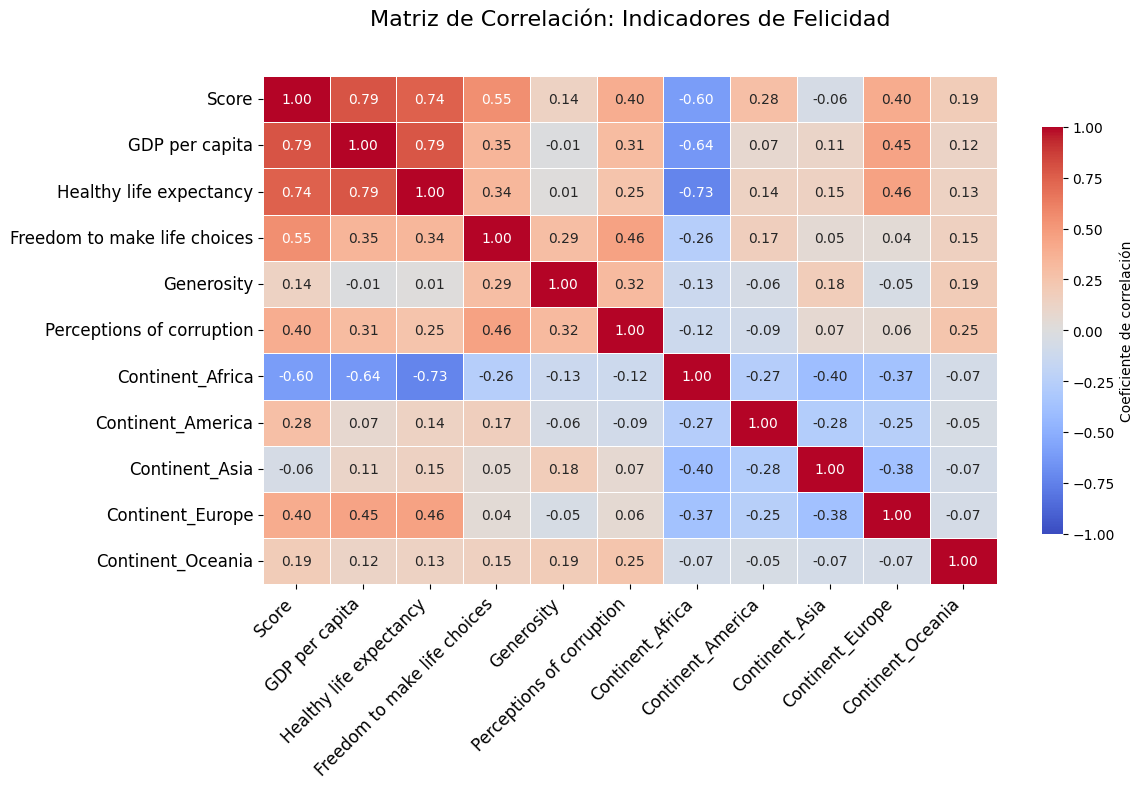

In [50]:
corr_matrix = happiness_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8, "label": "Coeficiente de correlación"}
)

plt.title('Matriz de Correlación: Indicadores de Felicidad\n', pad=20, fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

max_corr = corr_matrix.unstack().sort_values(ascending=False)
print(f"\n🔷 Correlación más fuerte: {max_corr[1]:.2f}")
print(f"🔶 Correlación más débil: {max_corr[-1]:.2f}")

plt.tight_layout()
plt.show()

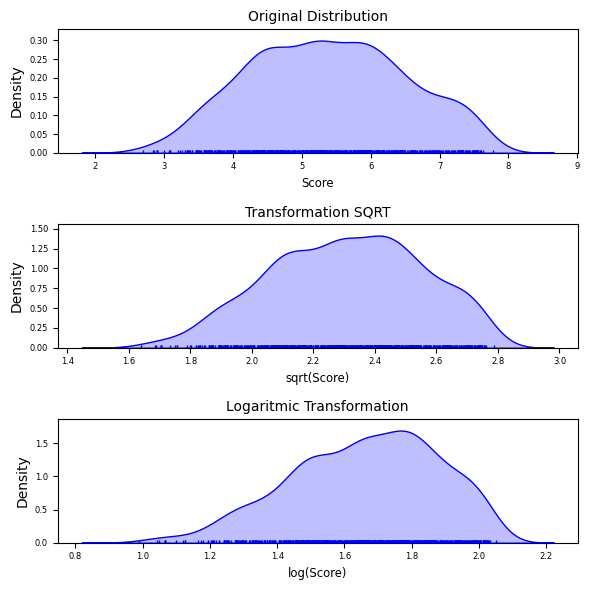

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    happiness_df.Score,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    happiness_df.Score,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Original Distribution", fontsize = 'medium')
axes[0].set_xlabel('Score', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(happiness_df.Score),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(happiness_df.Score),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformation SQRT", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Score)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(happiness_df.Score),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(happiness_df.Score),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Logaritmic Transformation", fontsize = 'medium')
axes[2].set_xlabel('log(Score)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()


In [52]:
distributions = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(happiness_df.Score, distributions=distributions)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

2025-05-23 13:07:40.666 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=1.264869)
2025-05-23 13:07:40.683 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=3.135143)
2025-05-23 13:07:40.721 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.807755)
2025-05-23 13:07:40.747 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.805214)
2025-05-23 13:07:40.750 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.798384)
2025-05-23 13:07:40.752 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=1.401301)
2025-05-23 13:07:40.804 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted logistic distribution with error=0.883452)
2025-05-23 13:07:40.815 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bet

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.755649,370.366835,389.009136,inf,0.032809,3.620107e-01
exponpow,0.771854,371.624240,385.605966,inf,0.034080,3.173680e-01
chi2,0.798384,387.488852,401.470578,inf,0.043007,1.080551e-01
gamma,0.805214,384.959650,398.941376,inf,0.042720,1.123122e-01
norm,0.807755,382.497600,391.818750,inf,0.044252,9.111584e-02
logistic,0.883452,388.904440,398.225590,inf,0.050123,3.817391e-02
cauchy,1.264869,431.314737,440.635887,inf,0.101097,2.110796e-07
powerlaw,1.401301,338.966155,352.947880,inf,0.149001,1.337089e-15
expon,3.135143,390.583296,399.904446,inf,0.275650,6.065341e-53


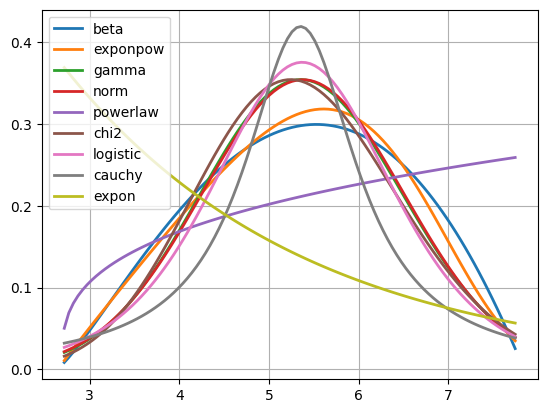

In [53]:
fitter.plot_pdf(names=['beta', 'exponpow', 'gamma', 'norm', 'powerlaw', 'chi2', 'logistic', 'cauchy', 'expon'])
plt.show()

In [54]:
stat, p_value = shapiro(happiness_df['Score'])
print(f"Shapiro-Wilk p-value = {p_value:.4f}")

Shapiro-Wilk p-value = 0.0000


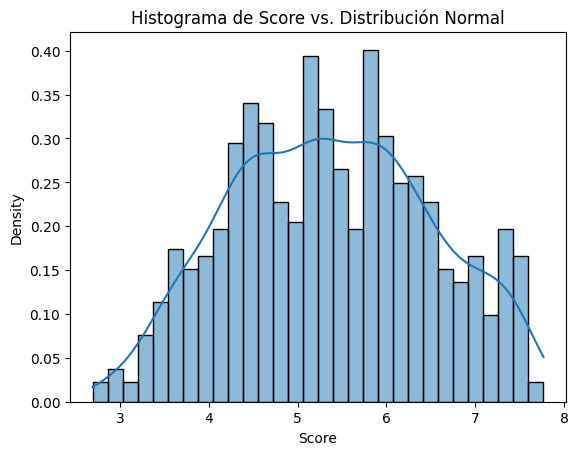

In [55]:
sns.histplot(happiness_df['Score'], kde=True, stat='density', bins=30)
plt.title('Histograma de Score vs. Distribución Normal')
plt.show()

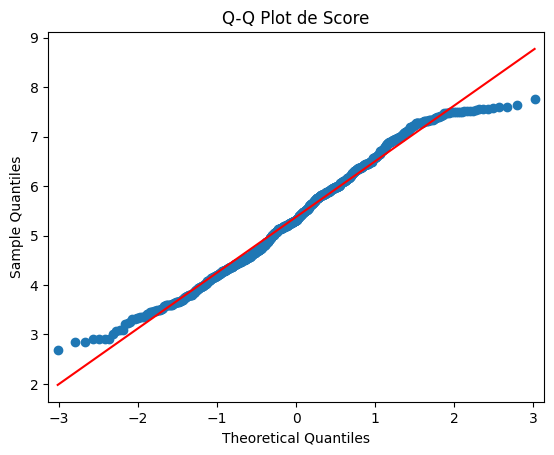

In [56]:
qqplot(happiness_df['Score'], line='s')  # 's' = línea teórica normal
plt.title('Q-Q Plot de Score')
plt.show()

The Score data isnt shows a normal distribution

In [57]:
happiness_df['Score_log'] = np.log1p(df['Score'])

In [58]:
df.head()

,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support,Continent,ID,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania
0,2015,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,1.34951,Europe,201501,0,0,0,1,0
1,2015,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,1.40223,Europe,201502,0,0,0,1,0
2,2015,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,1.36058,Europe,201503,0,0,0,1,0
3,2015,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,1.33095,Europe,201504,0,0,0,1,0
4,2015,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,1.32261,America,201505,0,1,0,0,0


In [59]:
df.select_dtypes(include=['float64', 'int']).describe()

,Year,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social support,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,2016.992318,5.377232,0.914537,0.612342,0.411254,0.218618,0.125436,1.078780,0.282971,0.154930,0.293214,0.256082,0.012804
std,1.417814,1.127071,0.405403,0.248459,0.152911,0.122394,0.105816,0.329581,0.450731,0.362069,0.455527,0.436747,0.112500
min,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.509000,0.605000,0.440060,0.310480,0.130000,0.054000,0.870210,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,5.321000,0.982000,0.647239,0.431000,0.202000,0.091000,1.125000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,6.182000,1.233748,0.808000,0.531000,0.279060,0.156030,1.328000,1.000000,0.000000,1.000000,1.000000,0.000000
max,2019.000000,7.769000,1.870766,1.141000,0.724000,0.838075,0.551910,1.644000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
resul = df[df['GDP per capita'] == 0]
print(resul)

     Year  Score  GDP per capita  Healthy life expectancy  \
119  2015  4.517             0.0                 0.098060   
233  2016  5.440             0.0                 0.114660   
469  2017  2.693             0.0                 0.018773   
567  2018  4.982             0.0                 0.115000   
737  2019  4.668             0.0                 0.268000   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
119                      0.226050    0.248340                   0.076250   
233                      0.567780    0.272250                   0.311800   
469                      0.270842    0.280876                   0.056565   
567                      0.674000    0.238000                   0.282000   
737                      0.559000    0.243000                   0.270000   

     Social support Continent       ID  Continent_Africa  Continent_America  \
119         1.00120    Africa  2015120                 1                  0   
233         0.3361

In [61]:
resul = df[df['Healthy life expectancy'] == 0]
print(resul)

     Year  Score  GDP per capita  Healthy life expectancy  \
122  2015  4.507        0.330240                      0.0   
268  2016  4.635        0.364850                      0.0   
453  2017  3.808        0.521021                      0.0   
582  2018  4.571        0.256000                      0.0   
760  2019  4.212        0.811000                      0.0   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
122                      0.408400    0.214880                   0.087860   
268                      0.306850    0.238970                   0.081960   
453                      0.390661    0.157497                   0.119095   
582                      0.355000    0.238000                   0.053000   
760                      0.313000    0.074000                   0.135000   

     Social support Continent       ID  Continent_Africa  Continent_America  \
122        0.955710    Africa  2015123                 1                  0   
268        0.62800

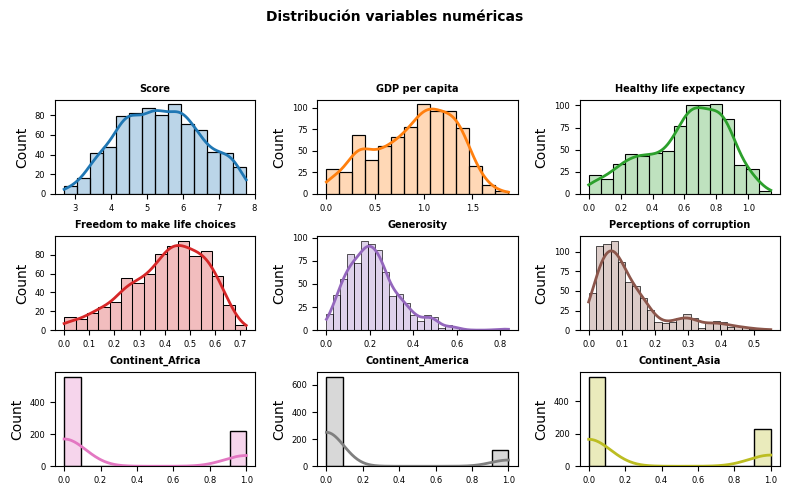

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 5))
axes = axes.flat

# Only plot up to the number of axes available (9)
for i, colum in enumerate(happiness_df.columns[:len(axes)]):
    sns.histplot(
        data     = happiness_df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

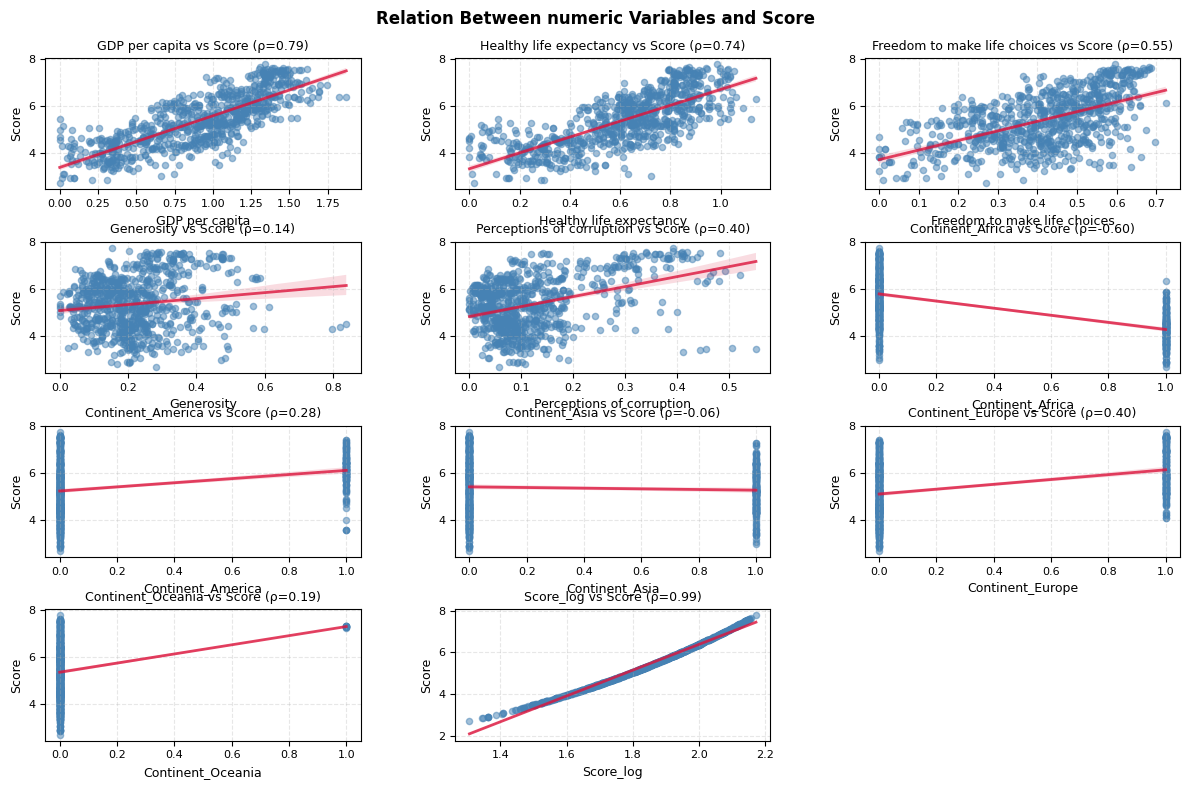

In [63]:

numeric_cols = happiness_df.select_dtypes(include=['float64', 'int']).columns.drop('Score','Score_log')

# Ajuste dinámico del grid de subplots
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
axes = axes.flatten()

# Gráficos de regresión para cada variable
for i, col in enumerate(numeric_cols):
    sns.regplot(
        x=happiness_df[col],
        y=happiness_df['Score'],
        scatter_kws={'alpha': 0.5, 's': 20, 'color': 'steelblue'},
        line_kws={'color': 'crimson', 'linewidth': 2, 'alpha': 0.8},
        ci=95,  # Intervalo de confianza del 95%
        ax=axes[i]
    )
    
    # Personalización de ejes y título
    axes[i].set_title(f'{col} vs Score', fontsize=10, pad=10, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Score', fontsize=9)
    axes[i].tick_params(axis='both', labelsize=8)
    
    # Grid suave
    axes[i].grid(True, linestyle='--', alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
fig.suptitle('Relation Between numeric Variables and Score', 
             fontsize=12, 
             fontweight='bold',
             y=0.98)

# Mostrar correlaciones en el título de cada subplot (opcional)
for i, col in enumerate(numeric_cols):
    corr = happiness_df[['Score', col]].corr().iloc[0,1]
    axes[i].set_title(f"{col} vs Score (ρ={corr:.2f})", fontsize=9)

plt.show()


🔷 Correlación más fuerte: 1.00
🔶 Correlación más débil: -0.73


/tmp/ipykernel_1400/2699181015.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n🔷 Correlación más fuerte: {max_corr[1]:.2f}")
/tmp/ipykernel_1400/2699181015.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"🔶 Correlación más débil: {max_corr[-1]:.2f}")


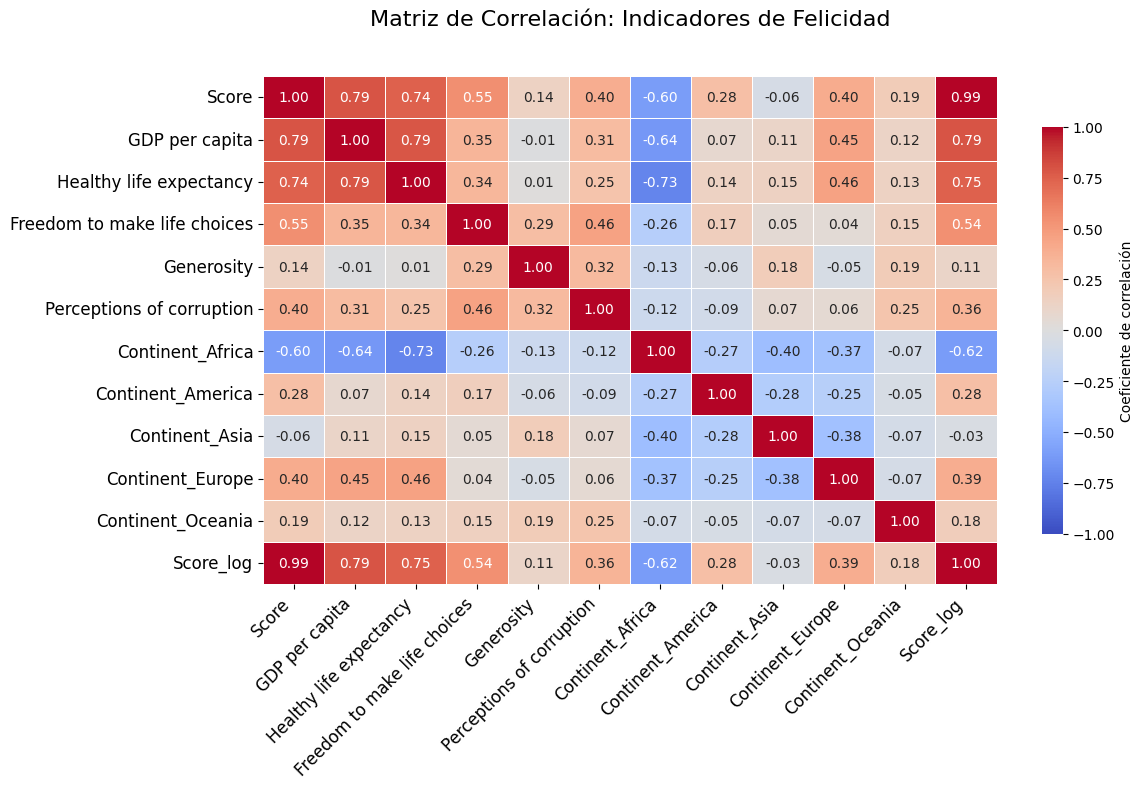

In [64]:
corr_matrix = happiness_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8, "label": "Coeficiente de correlación"}
)

plt.title('Matriz de Correlación: Indicadores de Felicidad\n', pad=20, fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

max_corr = corr_matrix.unstack().sort_values(ascending=False)
print(f"\n🔷 Correlación más fuerte: {max_corr[1]:.2f}")
print(f"🔶 Correlación más débil: {max_corr[-1]:.2f}")

plt.tight_layout()
plt.show()

In [65]:
#happiness_df.drop(columns=['Generosity'], inplace=True)
happiness_df.drop(columns=['Continent_Oceania'], inplace=True)
happiness_df.drop(columns=['Continent_Asia'], inplace=True)


In [66]:
happiness_df.shape

(781, 10)

In [67]:
happiness_df.head()

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent_Africa,Continent_America,Continent_Europe,Score_log
0,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,0,0,1,2.150249
1,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,0,0,1,2.147217
2,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,0,0,1,2.143238
3,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,0,0,1,2.142651
4,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,0,1,0,2.131441


In [68]:
happiness_df.to_csv('/home/user/workshop3_ml_datastreaming/data/processed/cleaned_data.csv', index=False)